<a href="https://colab.research.google.com/github/sarasabino/Accident_Rate_Project/blob/main/Src/Notebooks/01_Exploratorio_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
! cp /content/drive/MyDrive/'Colab Notebooks'/'TFM Accidentabilidad'/Data/HS_Accidentabilidad.csv .

In [190]:
import pandas as pd

accidentabilidad = pd.read_csv('HS_Accidentabilidad.csv', sep=';')

In [191]:
accidentabilidad.head()

,ID,- DATOS DEL SUCESO -,Codigo accidentado,Fecha introduccion datos,Fecha accidente,Año,Codigo fecha accidente,Planta,Código empleado,Supervisor,Puesto habitual de trabajo,Puesto habitual de trabajo - Cerrado,MOI o MOD,La estaba desempeñando,"En caso negativo, indicar qué estaba desempeñando",Edad,Género,Turno,Numero personas implicadas,Llevaba EPIs puestos,Hora,Hora jornada,Tipo trabajador,"En caso de ser ajeno, indicar empresa",Lugar o seccion accidente,Línea de producción,Tarea que estaba realizando,Cumplimiento Instruccion de Seguridad,¿Se ha incumplido alguna de las normas o instrucciones existentes y explicadas?,"En caso de incumplimiento, comentarios:","En caso negativo, indicar la razon",Experiencia en puesto,Fecha ultima formacion completa sobre instrucciones en el puesto,Condicion peligrosa,Forma de producirse,Factores de peligro,Acto inseguro,Naturaleza de lesion,- FORMA EN QUE SE PRODUJO -,Descripción supervisor,...,Responsable de Departamento,Nombre de Responsable,Fecha cierre informe,- VALORACIÓN DE LOS HECHOS -,Probabilidad de repeticion del suceso,Gravedad potencial,Podría haberse dado otro riesgo en estas circunstancias,- MEDIDAS DE CONTROL -,Posibilidad de este suceso detectada en la evaluación de riesgos,Estaban contempladas las medidas preventivas en la Instruccion de Seguridad,Los implicados conocian la existencia del riesgo y las medidas a adoptar,"Se habian cumplido las normas establecidas, en caso de estar definidas",- PROPUESTA DE ACCIONES -,Estas acciones pueden añadir riesgos a los ya existentes,"1 En caso afirmativo, cual es",Se abre NC como consecuencia de esta investigacion,"2 En caso afirmativo, cual es",Requiere revision de Evaluacion de Riesgos,"3 En caso afirmativo, cual es",Requiere revision de alguna Instruccion de Seguridad,"4 En caso afirmativo, cual es",Requiere incorporar algun aspecto en el check list de Inspecciones,"5 En caso afirmativo, cual es",Requiere amonestacion verbal el empleado,"6 En caso afirmativo, cual es",Bloqueado,Fecha accidente trigger,- ACTUACIONES INMEDIATAS TOMADAS -,Actuación inmediata asistencial,Actuación inmediata instalaciones,- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -,Medida a planificar 1,Medida a planificar 2,Medida a planificar 3,Notificacion o investigacion,Modifica notificacion,Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?,"En caso afirmativo, cual es y como se actuó?",Tipo Tema,Acta reunión alta baja
0,1,0.0,HS-BRGS_0001,09/03/2019,18/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deficiente delimitación de zonas de trabajo o ...,NaN,NaN,Desconocimiento de riesgos y/o medidas prevent...,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-18,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
1,10,0.0,HS-BRGS_0010,09/03/2019,19/01/2016,2016.0,201601,2,NaN,0,Gruistas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Presencia o manejo de elementos pesados,NaN,Puentes grúa y accesorios de elevación,Incumplimiento de Instrucciones IS u otra orde...,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-19,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
2,11,0.0,HS-BRGS_0011,09/03/2019,28/01/2016,2016.0,201601,2,NaN,0,Gruista LONGI005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Movimientos intempestivos de la máquina,NaN,Puentes grúa y accesorios de elevación,Ninguno,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2016-01-28,0.0,NaN,NaN,0.0,NaN,NaN,NaN,No,NaN,NaN,NaN,3,NaN
3,12,0.0,HS-BRGS_0012,09/03/2019,29/01/2016,2016.0,201601,2,NaN,0,Gruista PRENSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [192]:
len(accidentabilidad) ##Our main table has 106 columns and 7797 rows

7797

### Accident rate table

This table will be our main data source. It contains all the accidents occur on a company during several years. Each row represent an accident occurr with one or more people involved. 

The dataframe shape is 106x7797, this means we have a total number of accidents equal to our table length

Let's explore this data to get some information

In [193]:
accidentabilidad.columns

Index(['ID', '-  DATOS DEL SUCESO -', 'Codigo accidentado',
       'Fecha introduccion datos', 'Fecha accidente', 'Año',
       'Codigo fecha accidente', 'Planta', 'Código empleado', 'Supervisor',
       ...
       '- PROPUESTA INICIAL DE MEDIDAS A PLANIFICAR -',
       'Medida a planificar 1', 'Medida a planificar 2',
       'Medida a planificar 3', 'Notificacion o investigacion',
       'Modifica notificacion',
       'Se ha dado un suceso similar (en cuanto a sus causas y consecuencias) en el último año en planta?',
       'En caso afirmativo, cual es y como se actuó?', 'Tipo Tema',
       'Acta reunión alta baja'],
      dtype='object', length=106)

In [194]:
## lets check how many years we have registered

accidentabilidad['Año'].unique()

## we have values from 2016 to 2021, as we can see we have some values without year. To be more clear we will use only accidents with year



array([2016., 2017., 2018.,   nan, 2015., 2019., 2020., 2021.])

In [195]:
# Nº rows without year

len(accidentabilidad[accidentabilidad['Año'].isnull()])

282

In [196]:
## checking nº accidents per year

year_df = accidentabilidad[['Año','Codigo accidentado']]

year_df = year_df.groupby('Año').agg('count')
year_df


,Codigo accidentado
Año,
2015.0,202
2016.0,1335
2017.0,1203
2018.0,1532
2019.0,1526
2020.0,1122
2021.0,595


In [197]:
year_df = year_df.reset_index()



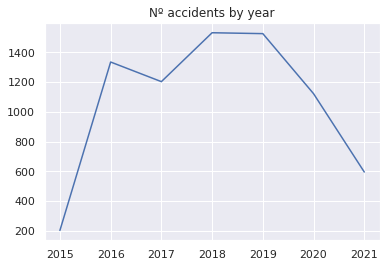

In [198]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

plt.plot(year_df['Año'], year_df['Codigo accidentado'])
plt.title('Nº accidents by year')
pyplot.show()


In [242]:

year_df = accidentabilidad[['Año','Codigo accidentado', 'Tipo accidente']]
year_df = year_df.reset_index()

year_df.drop(columns={'index'}, inplace=True)

In [247]:
year_df['Año'] = year_df['Año'].fillna(0).apply(int)

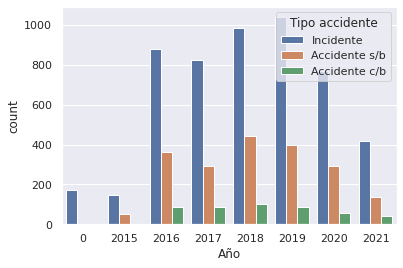

In [248]:
import seaborn as sns


ax = sns.countplot(x="Año", hue = 'Tipo accidente', data=year_df)


On the above chart we can observe clearly an ascending tendency until 2019. From 2019 to present the accidents start to descent greatly.

In [199]:
## Lets check which positions have been involved in an accident

positions = accidentabilidad['Puesto habitual de trabajo'].unique()

positions

array(['Gruista LONGI008', 'Gruistas', 'Gruista LONGI005', ...,
       'Raw Material and Fitter Operator', 'Mechanical Maintenance',
       'press operator '], dtype=object)

In [200]:
len(positions) ##total number of different positions involved in at least one accident


1449

In [201]:
position_df = accidentabilidad[['Codigo accidentado', 'Puesto habitual de trabajo']]
position_df = position_df.groupby(['Puesto habitual de trabajo' ]).agg('count')

In [202]:
position_df = position_df.reset_index()

In [203]:
position_df.rename(columns={'Codigo accidentado':'Count'}, inplace=True)
position_df.head()

,Puesto habitual de trabajo,Count
0,-,1
1,.,3
2,/,1
3,5000-3,1
4,500t Press,7


In [204]:
len(position_df)

1448

In [205]:
sorted_position = position_df.sort_values('Count', ascending=False).head(10)

In [206]:
sorted_position.head() ##carretillero is the position with more accidents

,Puesto habitual de trabajo,Count
190,Carretillero,170
406,Gruista,121
1247,Warehouse,113
1288,carretillero,67
995,Puente Grua - Flejador,51


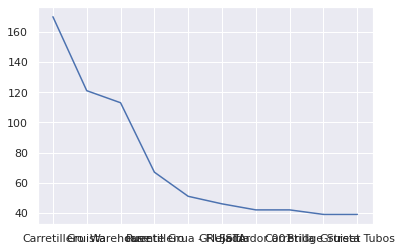

In [207]:
plt.plot(sorted_position['Puesto habitual de trabajo'], sorted_position['Count'])
plt.show()

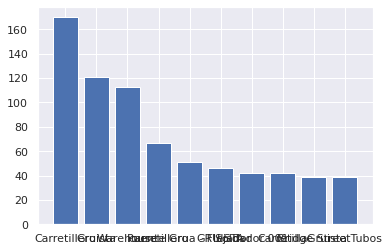

In [208]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = sorted_position['Puesto habitual de trabajo']
y = sorted_position['Count']

plt.bar(x,y)

plt.show()

Now we are going to analyze the type of people which has had the accidents. For that purpose we will create a new df with the relevant columns to this analysis.

We dont have data for all accidents so we will analyze the ones we have

In [209]:
empleado = accidentabilidad[['Edad', 'Género', 'Codigo accidentado']]

empleado.head()

,Edad,Género,Codigo accidentado
0,NaN,NaN,HS-BRGS_0001
1,NaN,NaN,HS-BRGS_0010
2,NaN,NaN,HS-BRGS_0011
3,NaN,NaN,HS-BRGS_0012
4,NaN,NaN,HS-BRGS_0013


In [210]:
empleado = empleado[(empleado['Edad'].isnull() == False) & (empleado['Género'].isnull() == False)]

empleado.head()

,Edad,Género,Codigo accidentado
1411,48,Hombre,HS-TRRG_1495
1423,32,Hombre,HS-BRGS_1507
1485,44,Hombre,HS-NVRR_1589
1513,33,Hombre,HS-TRRG_1617
1578,45,Hombre,HS-NVRR_1942


In [211]:
empleado.groupby(['Edad', 'Género']).agg('count')

Codigo accidentado
Edad         Género                    
*            Hombre                  10
-            Hombre                  14
             Mujer                    2
---          Mujer                    1
.            Hombre                   3
...                                 ...
na           Hombre                   1
none         Hombre                   6
se desconoce Hombre                   1
unknown      Hombre                   2
x            Hombre                   2

[139 rows x 1 columns]

In [212]:
## we get only numeric values or unknow for edad

empleado['Edad'] = empleado['Edad'].apply(lambda x: x if x.isnumeric() else 'unknown')

In [213]:
empleado_grouped = empleado.groupby(['Edad', 'Género']).agg('count')

In [214]:
empleado_grouped.head()

,,Codigo accidentado
Edad,Género,
10,Hombre,1
100,Hombre,13
17,Hombre,3
18,Hombre,4
19,Hombre,13


In [215]:
empleado_grouped = empleado_grouped.sort_values('Codigo accidentado', ascending=False).reset_index()


In [216]:
empleado_grouped.head()

,Edad,Género,Codigo accidentado
0,40,Hombre,129
1,35,Hombre,120
2,unknown,Hombre,99
3,45,Hombre,99
4,30,Hombre,86


In [220]:
empleado = empleado.reset_index()

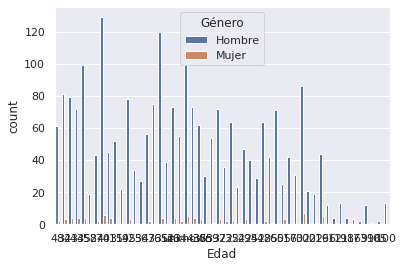

In [222]:

ax = sns.countplot(x="Edad", hue="Género", data=empleado)


At first sight we can see men have a lot more accidents than women. 40 years old men are the more target group. To see % rates we will need to compare with the Staff table.


Now lets check the number of accidents by turno

In [226]:
turno = accidentabilidad[['Codigo accidentado', 'Turno']]
turno = turno[turno['Turno'].isnull()==False]

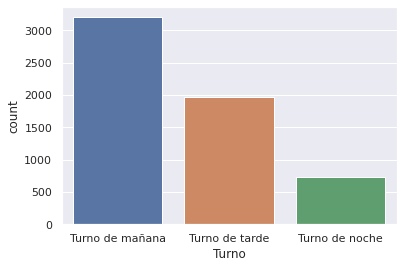

In [227]:
ax = sns.countplot(x="Turno",  data=turno)


This might be unexpected but the turn with more accidentes is the morning one, lets analyze the severity of the accidents in those turns

In [235]:
turno = accidentabilidad[['Codigo accidentado', 'Turno', 'Gravedad potencial']]
turno = turno.reset_index()

turno = turno[turno['Gravedad potencial'].isnull()==False]

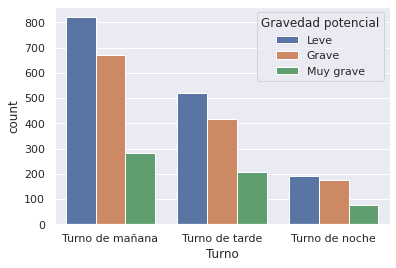

In [237]:
ax = sns.countplot(x="Turno", hue = 'Gravedad potencial', data=turno)


Morning turn keeps being the one with more severe accidents